In [126]:
from scipy import signal, stats
import numpy as np
import pandas as pd
from matplotlib.pyplot import *

%matplotlib inline

In [74]:
# the sampling frequency of ganglion is 200 Hz
fs = 200

In [81]:
d = pd.read_csv('data/smell_1491953550.csv')
d.head()

,timestamps,C1,C2,C3,C4,tag
0,1.491954e+09,11.126202,16.109617,11.887271,13.461769,baseline
1,1.491954e+09,13.285994,11.640438,13.228025,12.272481,baseline
2,1.491954e+09,10.552127,13.127048,16.128317,12.289310,baseline
3,1.491954e+09,12.311749,16.928656,14.437882,13.244855,baseline
4,1.491954e+09,12.068656,13.413151,15.056836,15.520584,baseline


In [82]:
## check the sampling rate (should be ~200Hz)
diffs = np.diff(d.timestamps)
diffs = diffs[diffs < 0.1]
1/np.mean(diffs)

200.02977421197346

In [83]:
X = np.array(d.ix[:, 1:5])
tag = np.array(d.tag)

In [153]:
freq, y_baseline = signal.welch(X[tag == 'baseline'].T, fs=fs)
freq, y_smell = signal.welch(X[tag == 'smell'].T, fs=fs)

y_baseline = y_baseline.T
y_smell = y_smell.T

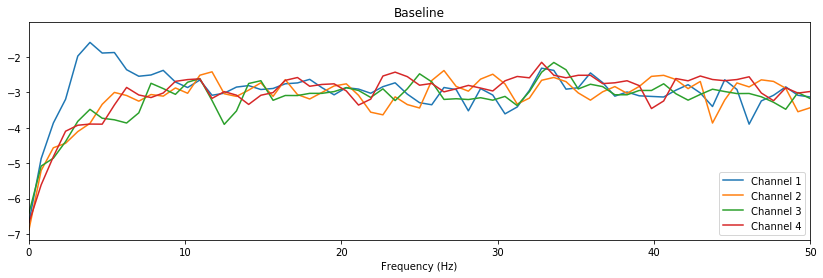

In [159]:
figure(figsize=(14,4))
for i in range(y_baseline.shape[1]):
    _ = plot(freq, np.log(y_baseline[:, i]), label='Channel {}'.format(i+1))
plt.legend()
plt.title('Baseline')
plt.xlim(0,50)
_ = plt.xlabel('Frequency (Hz)')

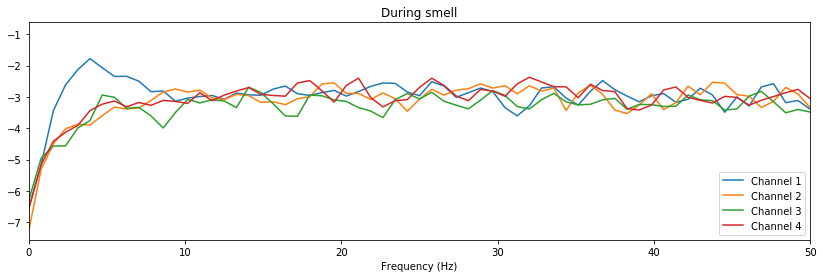

In [160]:
figure(figsize=(14,4))
for i in range(y_smell.shape[1]):
    _ = plot(freq, np.log(y_smell[:, i]), label='Channel {}'.format(i+1))
plt.legend()
plt.title('During smell')
plt.xlim(0,50)
_ = plt.xlabel('Frequency (Hz)')

In [161]:
def moving_average(sig, n=5):
    filt = np.ones(n) / n
    return np.convolve(sig, filt, 'same')

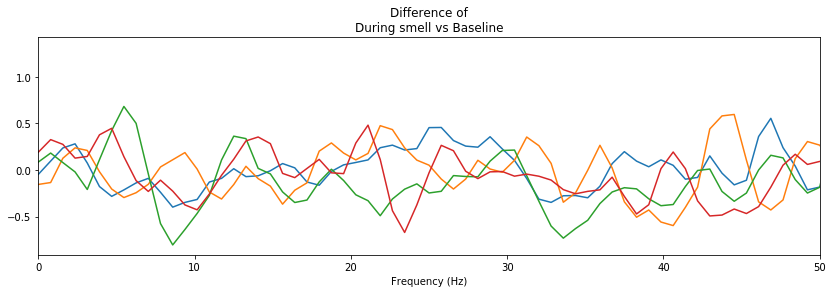

In [162]:
figure(figsize=(14,4))
diffs = np.log(y_smell) - np.log(y_baseline)
for i in range(diffs.shape[1]):
    avg = moving_average(diffs[:, i], n=3)
    _ = plt.plot(freq, avg, label='Channel {}'.format(i+1))
plt.title('Difference of\nDuring smell vs Baseline')
plt.xlim(0,50)
_ = plt.xlabel('Frequency (Hz)')
